In [ ]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_raw=pd.read_csv("Train.csv")
test_raw=pd.read_csv("Test.csv")
#print(train_raw) #prints the df
train=train_raw.dropna()
#train = train_raw.dropna().copy()
test=test_raw.dropna()
#print(train) #prints the cleaned df
print (train)

      Unnamed: 0                                           Name   Location  \
0              0            Tata Tiago 1.2 Revotron XZ WO Alloy  Hyderabad   
1              1     Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT      Kochi   
2              2         Skoda Rapid 2013-2016 1.6 MPI Ambition     Mumbai   
3              3                        Tata Indica V2 DLS BSII     Jaipur   
4              4           Tata Manza Club Class Quadrajet90 LX     Mumbai   
...          ...                                            ...        ...   
3745        3745                                    BMW X5 3.0d    Chennai   
3746        3746  Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV      Delhi   
3747        3747                        Maruti Wagon R LXI BSII  Ahmedabad   
3748        3748                 Renault Duster 85PS Diesel RxL  Hyderabad   
3749        3749                       Maruti Wagon R VXI BS IV    Kolkata   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [ ]:
#1 encoding the strings with numbers
#train['Name'] = pd.factorize(train['Name'])[0] # here,  name column is replaced
train.loc[:, 'Name'] = pd.factorize(train['Name'])[0]
train.loc[:, 'Location'] = pd.factorize(train['Location'])[0]
train.loc[:, 'Fuel_Type'] = pd.factorize(train['Fuel_Type'])[0]
train.loc[:, 'Transmission'] = pd.factorize(train['Transmission'])[0]
train.loc[:, 'Owner_Type'] = pd.factorize(train['Owner_Type'])[0]

test.loc[:, 'Name'] = pd.factorize(test['Name'])[0]
test.loc[:, 'Location'] = pd.factorize(test['Location'])[0]
test.loc[:, 'Fuel_Type'] = pd.factorize(test['Fuel_Type'])[0]
test.loc[:, 'Transmission'] = pd.factorize(test['Transmission'])[0]
test.loc[:, 'Owner_Type'] = pd.factorize(test['Owner_Type'])[0]

In [ ]:
#2 remove units

train = train.replace([' kmpl', ' CC', ' bhp'], ['', '', ''], regex=True)
train['Mileage'] = train['Mileage'].astype(float)
train['Engine'] = train['Engine'].astype(float)
train.Power = train.Power.replace(['null bhp', '0 bhp', 'null'], ['0', '0', '0'],  regex=True)
train['Power'] = train['Power'].astype(float)

test = test.replace([' kmpl', ' CC', ' bhp'], ['', '', ''], regex=True)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test.Power = test.Power.replace(['null bhp', '0 bhp', 'null'], ['0', '0', '0'],  regex=True)
test['Power'] = test['Power'].astype(float)

train=train.astype(int)
test=test.astype(int)

<ipython-input-16-d3dfa6c4e4ac>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = train.replace([' kmpl', ' CC', ' bhp'], ['', '', ''], regex=True)
<ipython-input-16-d3dfa6c4e4ac>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test = test.replace([' kmpl', ' CC', ' bhp'], ['', '', ''], regex=True)


In [ ]:
#3 separwating x n y
x= train.iloc[:, 1:-1] # : indicates all rows, and next start:stop
y= train.iloc[:, -1:]
x_test= test.iloc[:, 1:-1]
y_test= test.iloc[:, -1:]

print (x)

#didnt standardize specific columns as the graph got worse, couldnt understand why tho
'''
# Columns to standardize
columns_to_standardize = ['Kilometers_Driven','Mileage', 'Engine', 'Power']

# Standardize training data
x_train_mean = x[columns_to_standardize].mean(axis=0)
x_train_std = x[columns_to_standardize].std(axis=0)

x[columns_to_standardize] = (x[columns_to_standardize] - x_train_mean) / x_train_std #had written the code below already, so instead of a new variable, eidting x itself

# Use the same mean and std for test data
x_test[columns_to_standardize] = (x_test[columns_to_standardize] - x_train_mean) / x_train_std
'''

# Standardize training data
x_train_mean = x.mean(axis=0)
x_train_std = x.std(axis=0)

x = (x - x_train_mean) / x_train_std #had written the code below already, so instead of a new variable, eidting x itself

# Use the same mean and std for test data
x_test = (x_test - x_train_mean) / x_train_std


      Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0        0         0  2017              16500          0             0   
1        1         1  2017              47357          1             1   
2        2         2  2014              35000          0             0   
3        3         3  2007             200000          1             0   
4        4         2  2013              64000          1             0   
...    ...       ...   ...                ...        ...           ...   
3745   671         9  2009             150000          1             1   
3746  1487         8  2012              85000          1             1   
3747  1488        10  2007              55100          0             0   
3748   249         0  2014              77500          1             0   
3749   366         5  2012              40000          0             0   

      Owner_Type  Mileage  Engine  Power  Seats  
0              0       23    1199     84      5  
1          

In [ ]:
n=len(x)
m=len(x.columns)
itr=10000
rate=0.0005
w=np.zeros((m,1)) # an array
b=np.zeros((n,1))
y_pred=np.zeros((n,1))


#print(train)
#print (x['Year'])
'''print (w)
print (w.T) # farak nahi pada as w is 1d so no .T'''

'''print(type(x))  # Should be numeric, e.g., int64 or float64
print(type(w))'''

x = x.to_numpy()  # Convert x to NumPy array
# np.dot does not automatically handle Pandas DataFrames, so you need to convert them to NumPy arrays explicitly.

'''print(type(x))
print(type(x[0][0]))
print(type(w))
print(type(w[0]))'''

'print(type(x))\nprint(type(x[0][0]))\nprint(type(w))\nprint(type(w[0]))'

In [ ]:
#4 cost...not using
def cost(n,x,y,w):
  print ("x shape:", x.shape)
  print("w shape:", w.shape )
  y_pred=np.dot(x,w)
  print ("y_pred shape:", y_pred.shape)
  '''print (x)
  print  (w)
  print (y_pred)'''
  err =(1/(2*n))*np.sum(np.square(y_pred-y))

In [ ]:
#4 gradient descent and cost/error
def grad_desc(n,itr,rate,x,y,w,b, y_pred):
        error_list=[]
        diff=[]
        for i in range(itr):
          y_pred=np.dot(x,w)+b
          y=np.array(y)
          y_pred=np.array(y_pred)
          '''print ("...eferfe.",y_pred)
          print ("...eferfe.",y)'''
          err =(1/(2*n))*np.sum(np.square(y_pred-y))
          #print ("err",err,"err")
          dw=(1/n)*np.matmul(x.T , (y_pred-y))
          db=(1/n)*np.sum(y_pred-y)
          #print ("dw",dw.shape,"\n",dw,"dw")
          w=w-rate*dw
          b=b-rate*db
          error_list.append(err)
          # to see how err reduced
          # x is 3717x11, w is 11x1 so ypred is 3717x1
          '''print('y_pred[i]:',y_pred[i])
          print("x.T",x.T)'''
          '''print ("shape of x.T[i]", x.T[i].shape ) #x.T and x have diff dimentions so [i] wnt work
          print ("x.T[i]:",x.T[i])
          print ("reshape -1 1",x[i].reshape(-1,1)) # reshape is 11x1, y is 1x3717'''
          # for each element in w, acc to each element in x dot y-y_pred
          # x is 3717x11 so x.T is 11x3717, y is 3717x1, so w.T is 11x1
          #print(w.T)
        print ("......................................")
        print ("target\t\tpredicted")
        '''for k in range (n):
          print (y[k],"\t\t" ,y_pred[k])'''
        return (w,error_list,y,y_pred) # must RETURN y_pred else it remians 0 outside function

In [ ]:
'''print("w shape:", w.shape)
print("w.T shape:", w.T.shape)
print("y shape:", y.shape)
print("y_pred shape:", y_pred.shape)
print("x shape:", x.shape)  # (11, 3717) so x[i] is 1x3717 so x.T[i] dot y possible
print (x)
print (y)
print (y_pred)'''

#cost (n,x,y,w)
w, error_list,y,y_pred=grad_desc(n,itr,rate,x,y,w,b, y_pred)
for k in range (n):
          print (y[k],"\t\t" ,y_pred[k])
for i in range (itr):
  if (i%(itr/10)==0):
    print ("err number ",i,":",error_list[i])
print ("......................................")
print ("final error: ",error_list[-1])

......................................
target		predicted
[5] 		 [6.03416546]
[8] 		 [12.6769946]
[4] 		 [7.95987595]
[0] 		 [-4.48551601]
[2] 		 [5.02334903]
[2] 		 [6.14645386]
[3] 		 [3.59090804]
[17] 		 [20.84082587]
[3] 		 [4.25787048]
[59] 		 [36.15008971]
[2] 		 [-0.05906055]
[13] 		 [12.04144269]
[3] 		 [0.99335344]
[3] 		 [6.15006332]
[7] 		 [15.17786609]
[9] 		 [8.19126759]
[3] 		 [1.5383543]
[6] 		 [9.45313939]
[7] 		 [9.88719716]
[13] 		 [12.30919398]
[33] 		 [24.89258005]
[5] 		 [4.47044134]
[7] 		 [7.51651722]
[8] 		 [11.94331209]
[57] 		 [33.19702471]
[12] 		 [9.9426817]
[4] 		 [5.12335097]
[7] 		 [6.53570709]
[0] 		 [-9.27568041]
[5] 		 [7.72160479]
[15] 		 [18.87308567]
[11] 		 [16.81394597]
[9] 		 [12.98618685]
[43] 		 [29.95594609]
[2] 		 [4.26625717]
[5] 		 [8.80172153]
[39] 		 [24.52063912]
[8] 		 [21.11927556]
[1] 		 [-1.99476962]
[5] 		 [6.06613311]
[8] 		 [9.86863176]
[9] 		 [8.87037376]
[0] 		 [-0.91829751]
[17] 		 [20.81242695]
[10] 		 [6.39287079]
[5] 		 [2.60

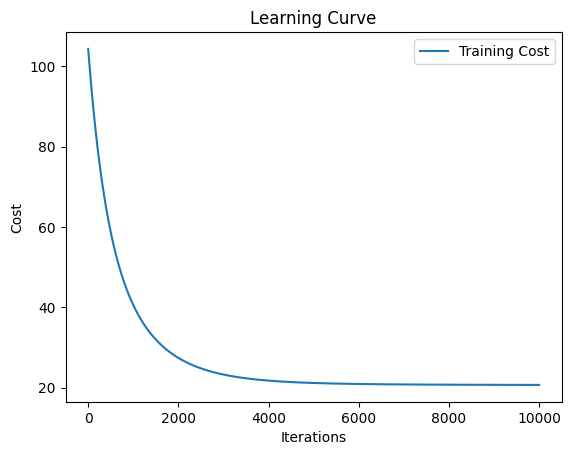

In [ ]:
#Plotting learning curve
plt.plot(error_list, label="Training Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.legend()
plt.show()

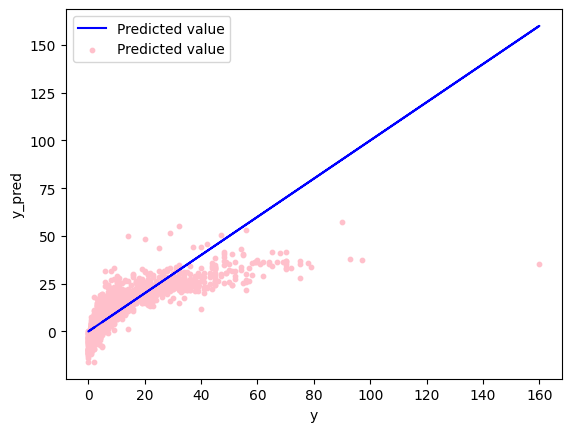

In [ ]:
plt.plot(y,y, label="Predicted value", color="blue")
plt.scatter(y,y_pred, label="Predicted value", color="pink", s=10)
plt.xlabel("y")
plt.ylabel("y_pred")
plt.legend()
plt.show()
